# Example: BIL to Histogram using python
In this example, the following **BIL** with two bands (*Band A* and *Band B*) is given:

[5,3,4,5,4,5,5,4,6,7,2,2,3,4,4,2,4,6,5,5,2,1,3,3,6,5,3,5,7,6,2,7,6,6,9,1,4,5,6,8,3,6,8,8,8,1,5,8,8,8]

A quick visualization of both bands as a matrix is created as well as histograms showing the frequencies of the values for both bands.

Firstly, all libraries which will be used are imported. Then, the BIL is stored as a list and split in the middle, followed by transforming the values into Numpy Arrays (for histogram creation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bil = [5,3,4,5,4,5,5,4,6,7,2,2,3,4,4,2,4,6,5,5,2,1,3,3,6,5,3,5,7,6,2,7,6,6,9,1,4,5,6,8,3,6,8,8,8,1,5,8,8,8]

"""Splitting list in the middle"""
band_a_list, band_b_list = bil[len(bil)//2:] , bil[:len(bil)//2]
"""Turning lists into numpy arrays"""
band_a_array , band_b_array = np.asarray(band_a_list) , np.asarray(band_b_list)

A quick help to visualize and understand the dataset better:
Since the list of numbers contains two bands, the first 25 nubers are the value of the pixels in Band A. The pixels are counted as 5 rows of 5 columns, so by manually adding nested lists we can quickly visualize the values at their correct position as a matrix.

*For larger datasets, this could be done automatically by using Pandas DataFrame or the (discouraged) NumPy Matrix*

In [26]:
band_a_nestedList = [[5,3,4,5,4],[5,5,4,6,7],[2,2,3,4,4],[2,4,6,5,5],[2,1,3,3,6]]
band_b_nestedList = [[5,3,5,7,6],[2,7,6,6,9],[1,4,5,6,8],[3,6,8,8,8],[1,5,8,8,8]]
print("Band A nested list array:")
for row in band_a_nestedList:
    print(row)
print("\nBand B nested list array:")
for row in band_b_nestedList:
    print(row)

Band A nested list array:
[5, 3, 4, 5, 4]
[5, 5, 4, 6, 7]
[2, 2, 3, 4, 4]
[2, 4, 6, 5, 5]
[2, 1, 3, 3, 6]

Band B nested list array:
[5, 3, 5, 7, 6]
[2, 7, 6, 6, 9]
[1, 4, 5, 6, 8]
[3, 6, 8, 8, 8]
[1, 5, 8, 8, 8]


After the visualization, we transform the lists into numpy arrays using the asarray() function from numpy. The type is printed to verify the result

In [10]:
band_a_array , band_b_array = np.asarray(band_a_list) , np.asarray(band_b_list)
print(type(band_a_array))
print(type(band_b_array))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Now, we move on to plot the histograms.
The function hist() from matplotlib.pyplot creates histograms from numpy arrays. The function takes the array as well as several other arguments such as transparancy (*alpha*), width of bars (*rwidth*) and the *bins*. If no bins are used, every unique value gets it's own bar, which is not useful when dealing with large datasets or floating point numbers. Bins are used to group values, for example in 10% groups. In our example, we have to adapt these bins so that each integer gets it's own "group". For that, we place the separator in 0.5 intervals around our values (for example: *0.5-1.5* in order to count the *1* values). We look at the complete dataset (Band A & B) to determine our lower and upper boundaries of the bins.

In [18]:
bins = np.arange(0, np.asarray(bil).max() + 1.5) - 0.5
print(bins_a)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


After determining the bins, we can plot the diagram. The main function is pyplot.hist(), which we use and paste our data, the defined bins and the colour, width, grid settings and transparancy of the bars. Also, axis titles are given and the upper limit of the graph is defined as the highest frequency + 10%. Please not that this number is extracted from *n*, which is a standart return from the pyplot.hist() function. For details about the returns, visit the function documentation.



Graph Histogram Band A




(0.0, 10.0)

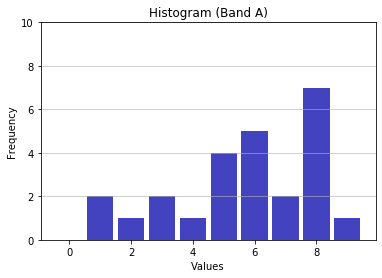

In [25]:
print("\n\nGraph Histogram Band A\n\n")
n, bins, patches = plt.hist(band_a_array, bins=bins, color='#0504aa', alpha=0.75, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram (Band A)')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)



Graph Histogram Band B




(0.0, 10.0)

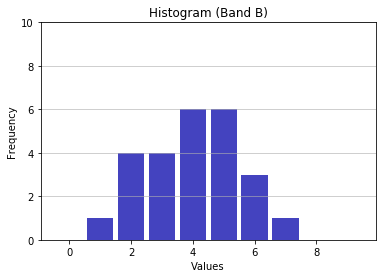

In [24]:
print("\n\nGraph Histogram Band B\n\n")
n, bins, patches = plt.hist(band_b_array, bins=bins, color='#0504aa', alpha=0.75, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram (Band B)')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

As a further demonstration, here is the same plot for a randomized Laplace distribution dataset (1000 values)

(0.0, 160.0)

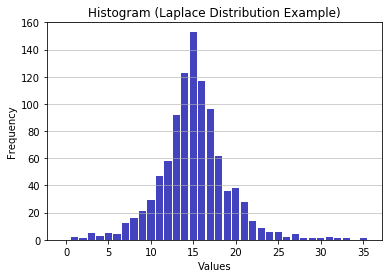

In [52]:
example = np.random.laplace(loc=15, scale=3, size=1000)
bins_example = np.arange(0, np.asarray(example).max() + 1.5) - 0.5

n, bins, patches = plt.hist(example, bins=bins_example, color='#0504aa', alpha=0.75, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram (Laplace Distribution Example)')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)